In [ ]:
# Import necessary libraries
import pandas as pd
from ipywidgets import FileUpload




In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_excel("/content/DBSCAN_1.xlsx")


In [ ]:
df.sample(7)

,longitude,latitude,no of accident
4,-3.94653,51.6594,53
15,-2.98169,51.348,32
36,-3.27546,51.404,86
18,-1.16379,52.6721,267
20,-1.93748,52.5172,1
83,-2.94807,53.412,93
84,-3.0382,53.4123,40


In [ ]:
# Check for null values in the entire DataFrame
null_counts = df.isnull().sum()
null_counts

longitude          1
latitude           1
no of accident     1
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   longitude        101 non-null    object
 1   latitude         101 non-null    object
 2   no of accident   101 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


In [ ]:
df.describe()

,longitude,latitude,no of accident
count,101.00000,101.0000,101
unique,101.00000,100.0000,46
top,-0.31099,51.6036,1
freq,1.00000,2.0000,26


In [ ]:
df

,longitude,latitude,no of accident
0,-0.31099,53.7802,280
1,-3.11255,55.8706,1
2,-0.088533,51.3806,1
3,-0.326795,51.4476,267
4,-3.94653,51.6594,53
...,...,...,...
97,-2.09202,57.1482,118
98,0.692144,51.7423,196
99,-4.21669,55.8545,1
100,NaN,NaN,NaN


In [ ]:
df_cleaned = df.dropna()

In [ ]:
df_cleaned

,longitude,latitude,no of accident
0,-0.31099,53.7802,280
1,-3.11255,55.8706,1
2,-0.088533,51.3806,1
3,-0.326795,51.4476,267
4,-3.94653,51.6594,53
...,...,...,...
96,-3.79902,51.6036,195
97,-2.09202,57.1482,118
98,0.692144,51.7423,196
99,-4.21669,55.8545,1


In [ ]:
df2=df_cleaned.drop(101)

In [ ]:
df2.sample(20)


,longitude,latitude,no of accident
72,-3.17575,51.5022,1
97,-2.09202,57.1482,118
80,-1.86852,52.9076,32
45,-0.365483,51.4443,57
95,-4.16543,55.7831,267
71,-1.80106,53.642,22
35,0.87316,51.143,12
93,-0.156888,51.5105,32
22,-1.18939,53.0464,1
12,-1.34684,53.4937,32


In [ ]:
# prompt: Using dataframe df2: suggest a plot

import altair as alt
chart = alt.Chart(df2).mark_circle().encode(
    x='longitude ',
    y='latitude',
    size='no of accident ',
    color='no of accident ',
    tooltip=['longitude ', 'latitude', 'no of accident ']
)
chart


alt.Chart(...)

In [ ]:
dfc=df2.copy()

In [ ]:
column_names = df.columns.tolist()

In [ ]:
column_names

['longitude ', 'latitude', 'no of accident ']

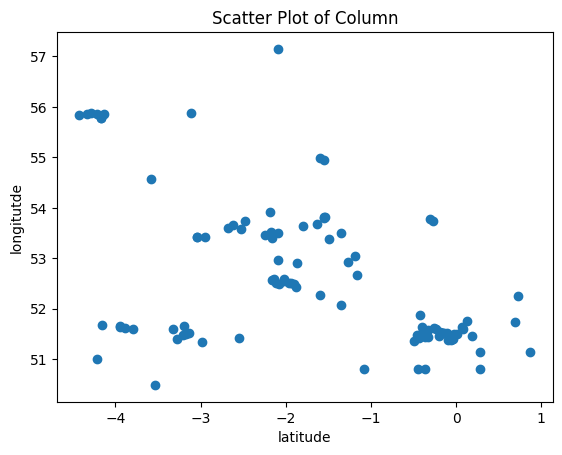

In [ ]:
import matplotlib.pyplot as plt

# Replace 'column_name' with the name of your column
plt.scatter(df2['longitude '], df2['latitude'])
plt.xlabel('latitude')
plt.ylabel('longitutde')
plt.title('Scatter Plot of Column')

plt.show()


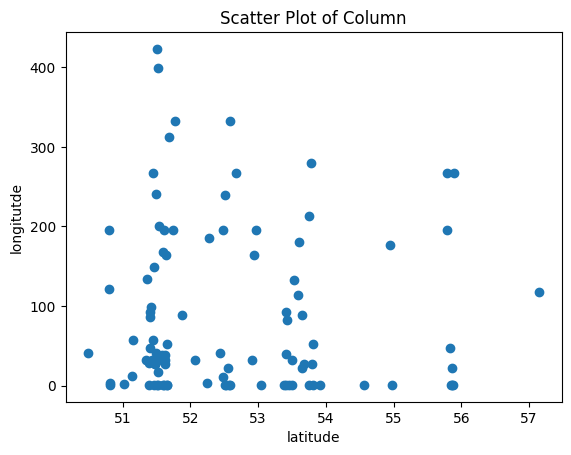

In [ ]:
# Replace 'column_name' with the name of your column
plt.scatter(df2['latitude'], df2['no of accident '])
plt.xlabel('latitude')
plt.ylabel('longitutde')
plt.title('Scatter Plot of Column')

plt.show()

<BarContainer object of 100 artists>

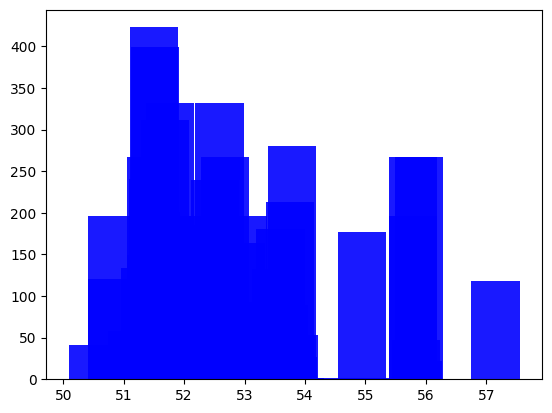

In [ ]:
plt.bar(df2['latitude'], df2['no of accident '], color='blue', alpha=0.9, label='Value1')

Text(0.5, 1.0, 'Plot between Latitude and Number of Accidents')

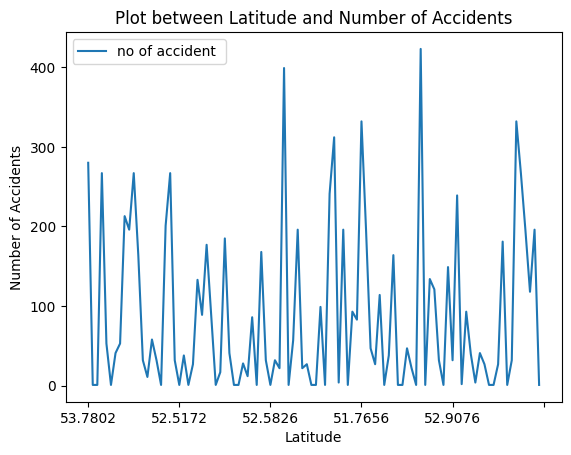

In [ ]:
df2.plot.line(x='latitude', y='no of accident ')
plt.xlabel('Latitude')
plt.ylabel('Number of Accidents')
plt.title('Plot between Latitude and Number of Accidents')

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


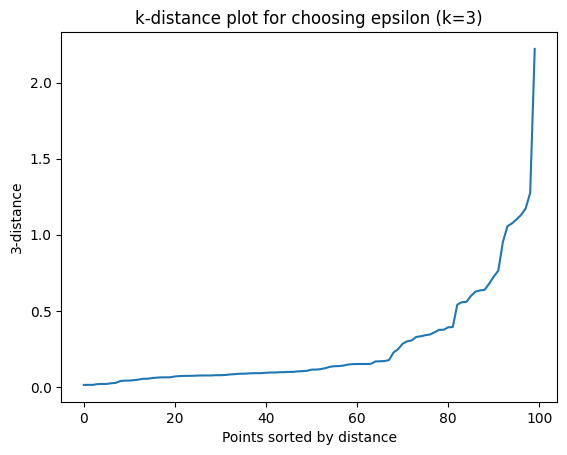

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Calculate the distance to the k-nearest neighbor for each point
k = 3 # Choose an appropriate value for k
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(df2[['longitude ', 'latitude']])
distances, _ = neigh.kneighbors(df2[['longitude ', 'latitude']])

# Sort the distances and plot the k-distance plot
sorted_distances = np.sort(distances[:, -1])
plt.plot(sorted_distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k}-distance')
plt.title(f'k-distance plot for choosing epsilon (k={k})')
plt.show()


In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator

# Find the knee/elbow point
kneedle = KneeLocator(np.arange(len(sorted_distances)), sorted_distances, S=1.0, curve='convex', direction='increasing')
knee_point = kneedle.elbow

print("Knee point:", knee_point)

Knee point: 88


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(df2[['longitude ', 'latitude']])

# Apply DBSCAN clustering
epsilon = .5# The maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples =4# The number of samples (or total weight) in a neighborhood for a point to be considered as a core point
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
df2['cluster'] = dbscan.fit_predict(X)

# Get the cluster centers
cluster_centers = df2.groupby('cluster')[['longitude ', 'latitude']].mean()

# Merge cluster centers with the original DataFrame
result = pd.merge(df2, cluster_centers, left_on='cluster', right_index=True, suffixes=('', '_cluster'))


In [ ]:
df2

,longitude,latitude,no of accident,cluster
0,-0.31099,53.7802,280,-1
1,-3.11255,55.8706,1,-1
2,-0.088533,51.3806,1,0
3,-0.326795,51.4476,267,0
4,-3.94653,51.6594,53,1
...,...,...,...,...
95,-4.16543,55.7831,267,3
96,-3.79902,51.6036,195,1
97,-2.09202,57.1482,118,-1
98,0.692144,51.7423,196,0


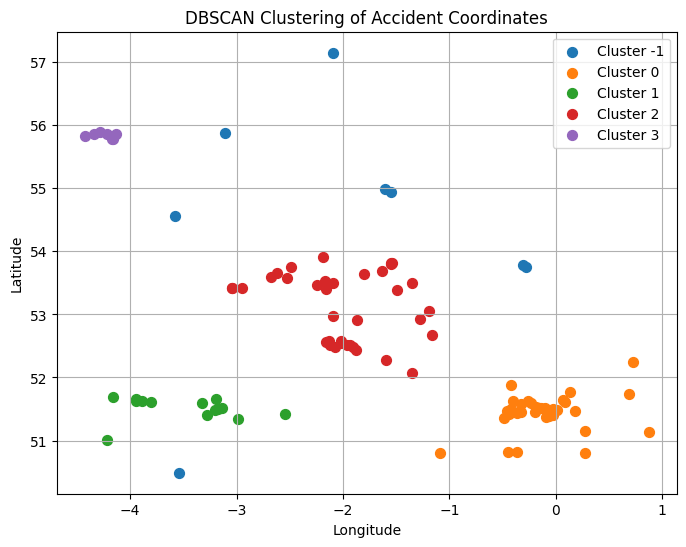

In [ ]:
plt.figure(figsize=(8, 6))
for cluster_label in np.unique(df2['cluster']):
    cluster_data = df2[df2['cluster'] == cluster_label]
    plt.scatter(cluster_data['longitude '], cluster_data['latitude'], label=f'Cluster {cluster_label}', s=50)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering of Accident Coordinates')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
column_names = df2.columns.tolist()
column_names

['longitude ', 'latitude', 'no of accident ', 'cluster']

In [ ]:
# Assuming your DataFrame is named 'df'

# Count the number of rows with cluster value -1
num_noise_points = (df2['cluster'] == -1).sum()

print("Number of rows with cluster value -1:", num_noise_points)


Number of rows with cluster value -1: 8


In [ ]:
# Filter the DataFrame to select only the rows with cluster value -1
noise_points_df = df2[df2['cluster'] == -1]

# Calculate the sum of the 'no of accident' column for the filtered DataFrame
sum_accidents_noise_points = noise_points_df['no of accident '].sum()

print("Sum of total number of accidents for rows with cluster value -1:", sum_accidents_noise_points)


Sum of total number of accidents for rows with cluster value -1: 832


In [ ]:
# Filter the DataFrame to select rows with cluster value -1
cluster_minus_one_df = df2[df2['cluster'] == -1]

# Remove the rows with cluster value -1 from the original DataFrame
df_filtered = df2[df2['cluster'] != -1]

# Reset index if desired
cluster_minus_one_df.reset_index(drop=True, inplace=True)
df_filtered.reset_index(drop=True, inplace=True)

In [ ]:
df_filtered

,longitude,latitude,no of accident,cluster
0,-0.088533,51.3806,1,0
1,-0.326795,51.4476,267,0
2,-3.94653,51.6594,53,1
3,-0.447304,50.8153,1,0
4,-0.416988,51.4987,41,0
...,...,...,...,...
87,-2.13517,52.5851,332,2
88,-4.16543,55.7831,267,3
89,-3.79902,51.6036,195,1
90,0.692144,51.7423,196,0


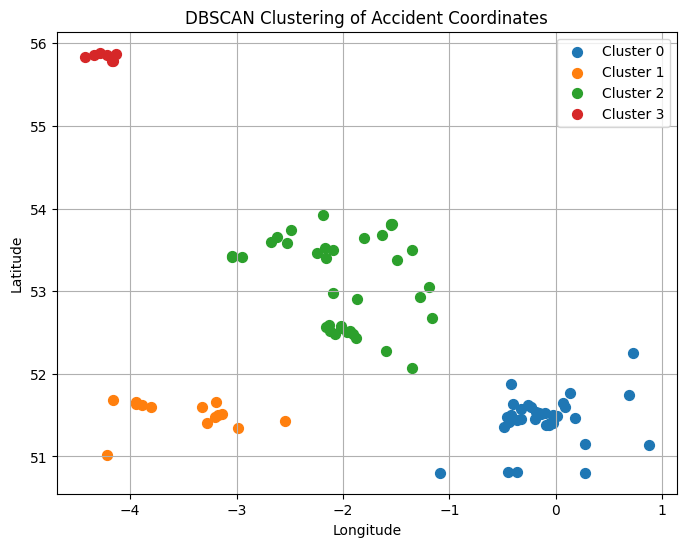

In [ ]:
plt.figure(figsize=(8, 6))
for cluster_label in np.unique(df_filtered['cluster']):
    cluster_data = df_filtered[df_filtered['cluster'] == cluster_label]
    plt.scatter(cluster_data['longitude '], cluster_data['latitude'], label=f'Cluster {cluster_label}', s=50)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering of Accident Coordinates')
plt.legend()
plt.grid(True)
plt.show()

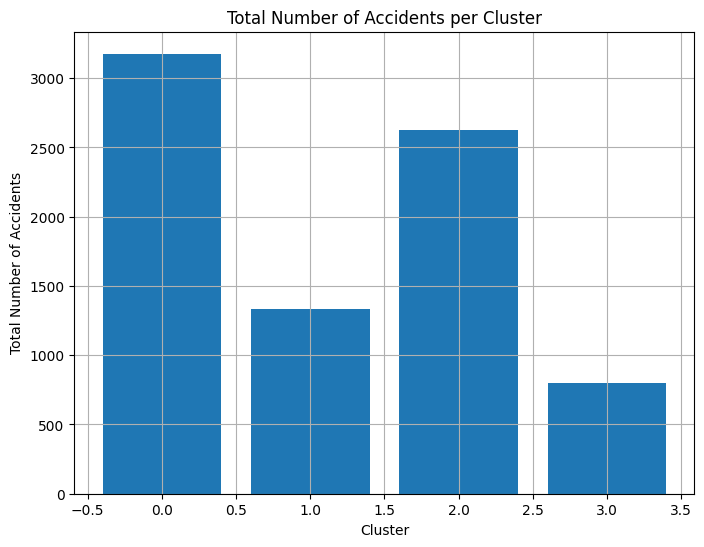

In [ ]:

# Plotting number of accidents per cluster
plt.figure(figsize=(8, 6))
cluster_counts = df_filtered.groupby('cluster')['no of accident '].sum()
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Total Number of Accidents')
plt.title('Total Number of Accidents per Cluster')
plt.grid(True)
plt.show()

